# Upper Confidence Bound (UCB)

The __UCB__ is a statistics-based algorithm that uses *confidence bounds* and exploration to determine the best action to take. It is best proved through a demonstration of the algorithm. Lets start with the average expected values for each action. These expected values aren't known by the algorithm and are simply present for visualization.

<img src="expectedValues.png" width="600px;" alt="Actual expected values of different machines." />

## Algorithm

1. Each action is assigned an average expected value and average confidence bound.

<img src="startingBounds.png" width="600px;" alt="Average expected value and confidence bound assigned to each action." />

2. Each action is explored once to create initial assumptions. The expected value is changed based on success or failure, and the confidence bound decreases as the algorithm is more confident about its assumption. 

<img src="exploration.png" width="600px;" alt="Exploring each action." />

(__NOTE:__ The determined expected value isn't based on the actual expected value; this is shown by the expected value for the _blue_ action, which has moved away from the actual expected value.)

3. The action with the highest upper confidence bound will be selected every turn, until all turns are completed. The expected value is changed based on success or failure each iteration and the confidence bound continues to decrease. It is important to choose an action based off of the upper confidence bound because the algorithm isn't looking for the action with the current highest expected value, but rather the action that has the potential to have the highest expected value. 

    <img src="upperConfidence.png" width="600px;" alt="The blue action is being taken due to having the highest confidence bound." />
    
__-__ While the only action taken from __Step 1__ to the current position is the _yellow_ action, the next action taken will be the _blue_ action. This is because it has the highest confidence bound and thus a chance to have the highest expected value.

<img src="upperConfidence2.png" width="600px;" alt="The green action is taken next due to having the highest confidence bound." />
    
__-__ The same case now applies to the _green_ action.

<img src="upperConfidence3.png" width="600px;" alt="The yellow action's confidence bound is currently the highest." /> 
    
__-__ The generated expected value for the _yellow_ action is very close to it's actual expected value. Even though the confidence bounds may decrease, the expected value is already higher than any other action's upper confidence bound. The _yellow_ action will most likely be performed in every turn from this point, unless the _yellow_ action constantly returns a failure value (this is statistically very unlikely because of the _yellow_ action's true expected value).

## Calculating the Expected Value and Confidence Bound

### Expected Value


$$\large \bar r_i(n) = \frac{R_i(n)}{N_i(n)} $$

__Where:__
* $ n $: Current Action
* $ \bar r_i(n) $: Expected _(Reward)_ Value
* $ R_i(n) $: Total sum of rewards.
* $ N_i(n) $: # of times the action was chosen.

### Confidence Bound / Interval


$$\large [\bar r_i(n) - \Delta_i(n), \bar r_i(n) + \Delta_i(n)] $$

__And:__

$$\large \Delta_i(n) = \sqrt{\frac{3}{2} \times \frac{log(n)}{N_i(n)}} $$

__Where:__
* $ n $: Current Action
* $ \Delta_i(n) $: One-Sided Confidence Bound Range
* $ N_i(n) $: # of times the action was chosen.
* $ (\bar r_i(n) + \Delta_i(n)) $: __Upper Confidence Bound__

<hr>

## Code  (Personally Implemented)

__Importing Required Libraries:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Mathematical functions required to calculate the upper confidence bound.
from math import sqrt, log

<hr>

__Variables:__

In [2]:
# Hard-coded limit on how large the upper confidence bound can be.
MAX_BOUND_LIMIT = 1e400

# Getting the total possible actions and number of iterations of the algorithm.
dataset = pd.read_csv('CTR_Optimization.csv')
total_actions = range(len(dataset.columns))
total_steps = dataset.index

# Keeps track of how many times each action was selected.
selection_count = [0] * len(total_actions)

# Keeps track of the total reward count for each action. 
reward_sum = [0] * len(total_actions)

# Keeps track of which action was performed at each iteration.
actions_selected = []

# Keeps track of the total reward gained from using UCB
total_reward = 0

__NOTE:__ Having a dataset isn't realistic for reinforcement learning algorithms. The algorithm not only bases itself off of previous results, but also uses these previous results to predict the next action to take. A dataset is simply convenient because it provides the various outcomes for choosing an action at each step. The algorithm still acts as though this information isn't already present and modifies itself interactively at each step. 

<hr>

__UCB Algorithm:__

In [7]:
# Loop represents each iteration of the algorithm
for step in total_steps:
    # Keeps track of the action with the highest upper bound
    best_action = -1
    max_upper_bound = -1
    
    # Iterates through every action possible to find the action that has the potential to be most sucessful.
    for action in total_actions:
        # Initally set to MAX_BOUND_LIMIT so that every action is iterated through once.
        action_upper_bound = MAX_BOUND_LIMIT
        
        # Once every action has been chosen once, the action chosen is based off of the calculated UCB.
        if selection_count[action] is not 0:
            average_reward = (reward_sum[action] / selection_count[action])
            confidence_bound_range = sqrt((3 / 2) * (log(step + 1) / selection_count[action]))
            action_upper_bound = average_reward + confidence_bound_range
        
        # If the current action has the highest_upper bound, the parent variables need to be updated.
        if action_upper_bound > max_upper_bound:
            max_upper_bound = action_upper_bound
            best_action = action
        
    # The action selected is kept track of and the action's selection count increments (because it was selected).
    actions_selected.append(best_action)
    selection_count[best_action] += 1

    # The total reward and the action's reward are changed according to a success or failure response.
    reward = dataset.values[step, best_action]
    reward_sum[best_action] += reward
    total_reward += reward

<hr>

__Printing Results:__

In [4]:
print('Total Reward: ' + str(total_reward))
print('Actions Taken: ' + str(actions_selected))

Total Reward: 2178
Actions Taken: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 6, 6, 7, 7, 7, 0, 6, 7, 4, 1, 1, 1, 2, 2, 2, 3, 5, 9, 2, 8, 7, 0, 1, 6, 4, 7,

<hr>

__Visualizing Results:__

Text(0, 0.5, 'Selection Count')

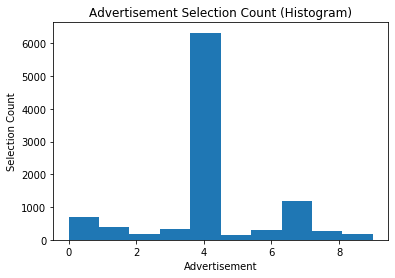

In [5]:
plt.hist(actions_selected)

# Labels are specific to the provided dataset.
plt.title('Advertisement Selection Count (Histogram)')
plt.xlabel('Advertisement')
plt.ylabel('Selection Count')

<hr>

__Visualizing Results of Randomizer:__

Total Reward: 1241


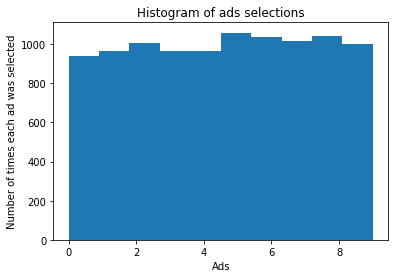

In [6]:
# Provided file.
import random_selection

<hr>

__Results:__ Compared to the randomizer, the UCB algorithm was able to accurately determine the most liked advertisement: the 4th advertisement. This helped almost double the click-through-rate and demonstrate the effectiveness of UCB. 